In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import os
import sys
import cmath
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

<ipython-input-1-7dcc411b4f67>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/My Drive/Colab Notebooks/Project'
    DATA_DIR = DIR + '/Data/timeseriesdata.csv'
    os.chdir(DIR)
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


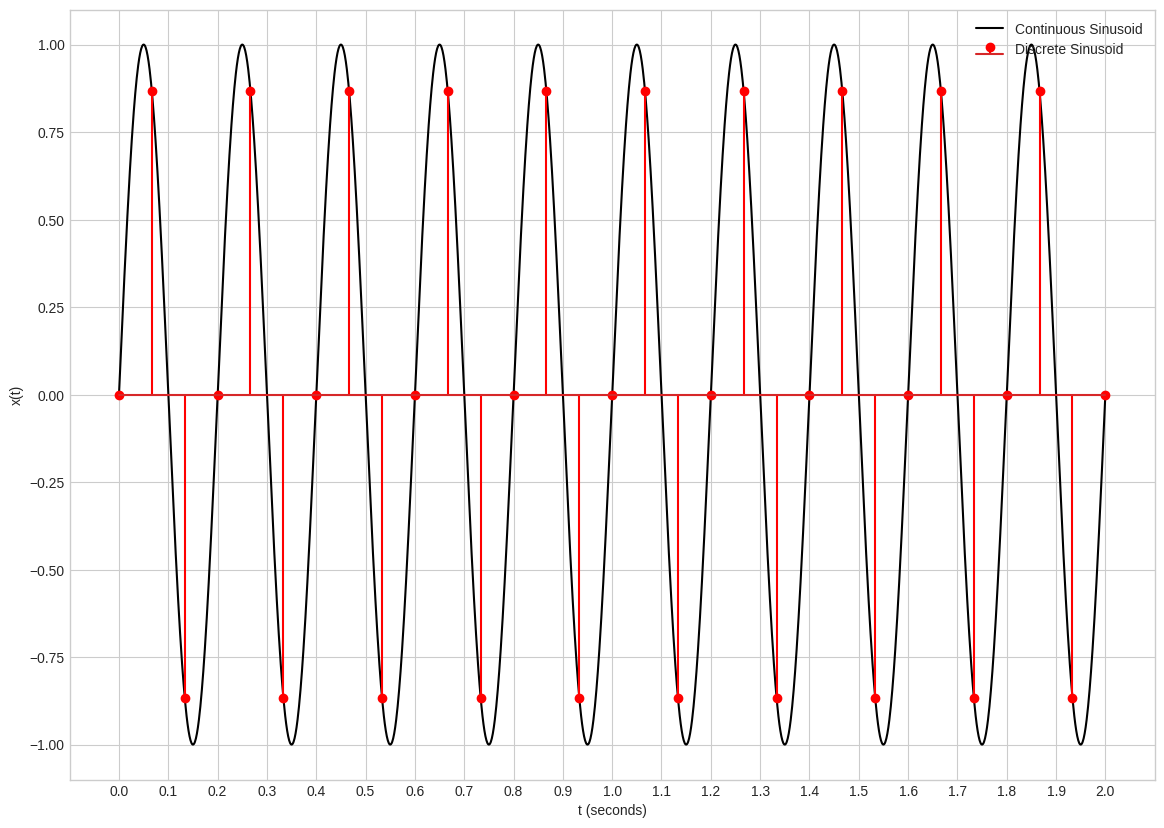

In [5]:
## Define and plot a continuos sinusoid along with its sampled discrete version
# Continuous sinusoid properties
f = 5 # cycle frequency
omega = 2 * np.pi * f # angular frequency
x = lambda t: np.sin(omega*t)

# Range of time for plotting
t_start = 0 # start time in sec
t_end = 2 # end time in sec

# Sampling information for creating the discrete sinusoid
fs = 3.0*f # sampling frequency
Ts = 1 / fs # sampling period

fig, ax = plt.subplots(1, 1, figsize = (14,10))
ax.plot(np.arange(t_start, t_end+1e-03, 1e-03), x(np.arange(t_start, t_end+1e-03, 1e-03)), 'k-', label = 'Continuous Sinusoid')
ax.stem(np.arange(t_start, t_end+1e-10, Ts), x(np.arange(t_start, t_end++1e-10, Ts)), 'r-', label = 'Discrete Sinusoid')
ax.set_xlabel('t (seconds)')
ax.set_ylabel('x(t)')
ax.set_xticks(np.arange(t_start, t_end+1e-01, 1e-01))
ax.legend(loc = 'upper right')

In [6]:
# Load library for ECG data
from scipy.misc import electrocardiogram
x = electrocardiogram()

<ipython-input-6-6125dfa9dae4>:3: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  x = electrocardiogram()


In [7]:
def plotveccomp(x, name = ' ', color = 'black', marker = '*', axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = color, marker = marker)
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('t (seconds)')
  ax.set_ylabel('Voltage (millivolts)')
  ax.set_title(name)

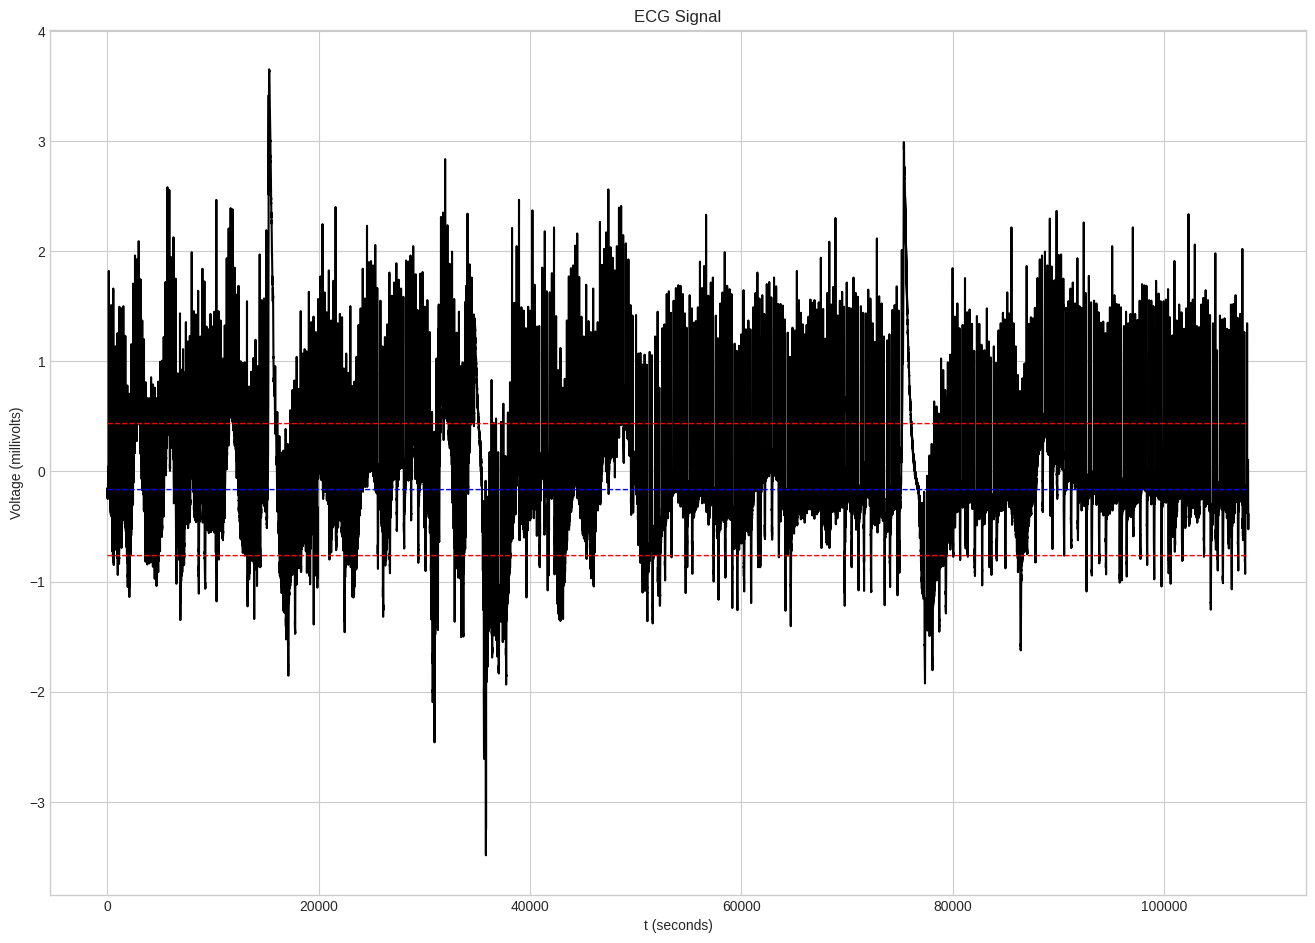

In [9]:
# Plot ECG signal
fig, ax = plt.subplots(1, 1, figsize = (14,10))
fig.tight_layout(pad = 4.0)
plotveccomp(x, 'ECG Signal', 'black', '', ax)

Text(0.5, 85.58333333333331, 't (seconds)')

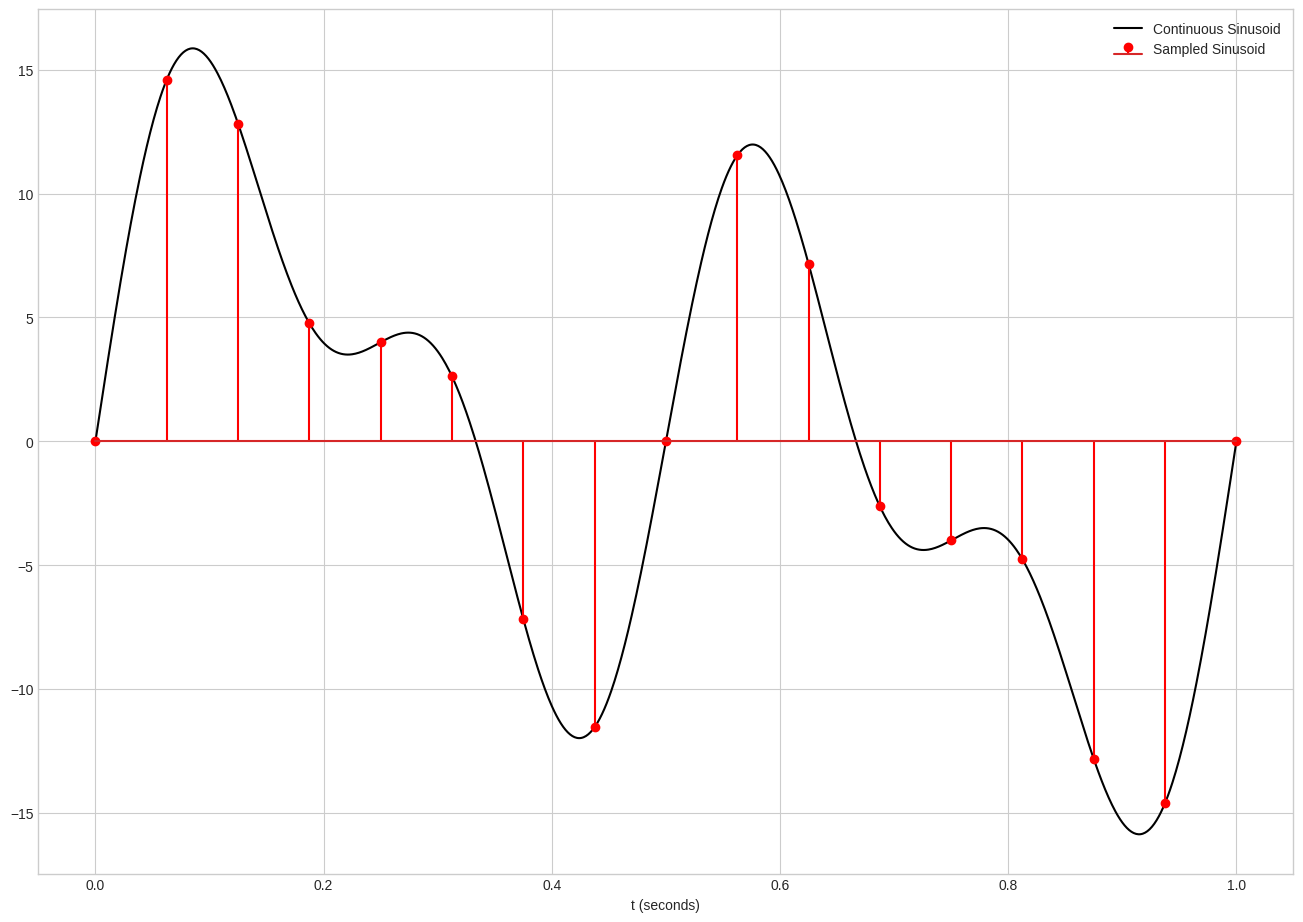

In [11]:
## Create a discrete signal that we will analyze using the fourier transform
# First create a continuous sinusoid which we will sample
f1 = 1 # cycle frequency
omega1 = 2 * np.pi * f1 # angular frequency
f2 = 2 # cycle frequency
omega2 = 2 * np.pi * f2 # angular frequency
f3 = 4 # cycle frequency
omega3 = 2 * np.pi * f3 # angular frequency
# Function definition for the continuous sinusoid
f = lambda t: 4*np.sin(omega1*t) + 10*np.sin(omega2*t) + 6*np.sin(omega3*t)

# Sampling information for creating the discrete sinusoid
fs = 4*f3 # sampling frequency (should be greater than 2 times the highest frequency in the signal)
Ts = 1 / fs # sampling period

# Range of time for creating the discrete sinusoid
t_start = 0.0 # start time in sec
t_end = 1.0 # end time in sec

# Create the discrete sinuosid by sampling the continuous sinusoid
x = f(np.arange(t_start, t_end+Ts, Ts))

# Plot the continuous and discrete sinusoid
fig, ax = plt.subplots(1, 1, figsize = (14,10))
fig.tight_layout(pad = 4.0)
ax.plot(np.arange(t_start, t_end+1e-03, 1e-03), f(np.arange(t_start, t_end+1e-03, 1e-03)), 'k-', label = 'Continuous Sinusoid')
ax.stem(np.arange(t_start, t_end+1e-10, Ts), x, 'r-', label = 'Sampled Sinusoid')
ax.legend(loc = 'upper right')
ax.set_xlabel('t (seconds)')

In [12]:
x

array([ 0.00000000e+00,  1.46018015e+01,  1.28284271e+01,  4.76658594e+00,
        4.00000000e+00,  2.62445032e+00, -7.17157288e+00, -1.15403341e+01,
       -4.89858720e-15,  1.15403341e+01,  7.17157288e+00, -2.62445032e+00,
       -4.00000000e+00, -4.76658594e+00, -1.28284271e+01, -1.46018015e+01,
       -1.17566093e-14])

[-1.59872116e-14 +0.j          7.29144906e+00-39.00580729j
  2.89031548e+01-74.60764282j -4.65431221e+00 +7.51697232j
  2.34586592e+01-25.73292334j -1.93677768e+01+14.62586614j
 -1.31078469e+01 +6.52693219j -1.15271949e+01 +3.27976973j
 -1.09961323e+01 +1.01894171j -1.09961323e+01 -1.01894171j
 -1.15271949e+01 -3.27976973j -1.31078469e+01 -6.52693219j
 -1.93677768e+01-14.62586614j  2.34586592e+01+25.73292334j
 -4.65431221e+00 -7.51697232j  2.89031548e+01+74.60764282j
  7.29144906e+00+39.00580729j]


Text(0.5, 85.58333333333331, 'Frequency (Hz)')

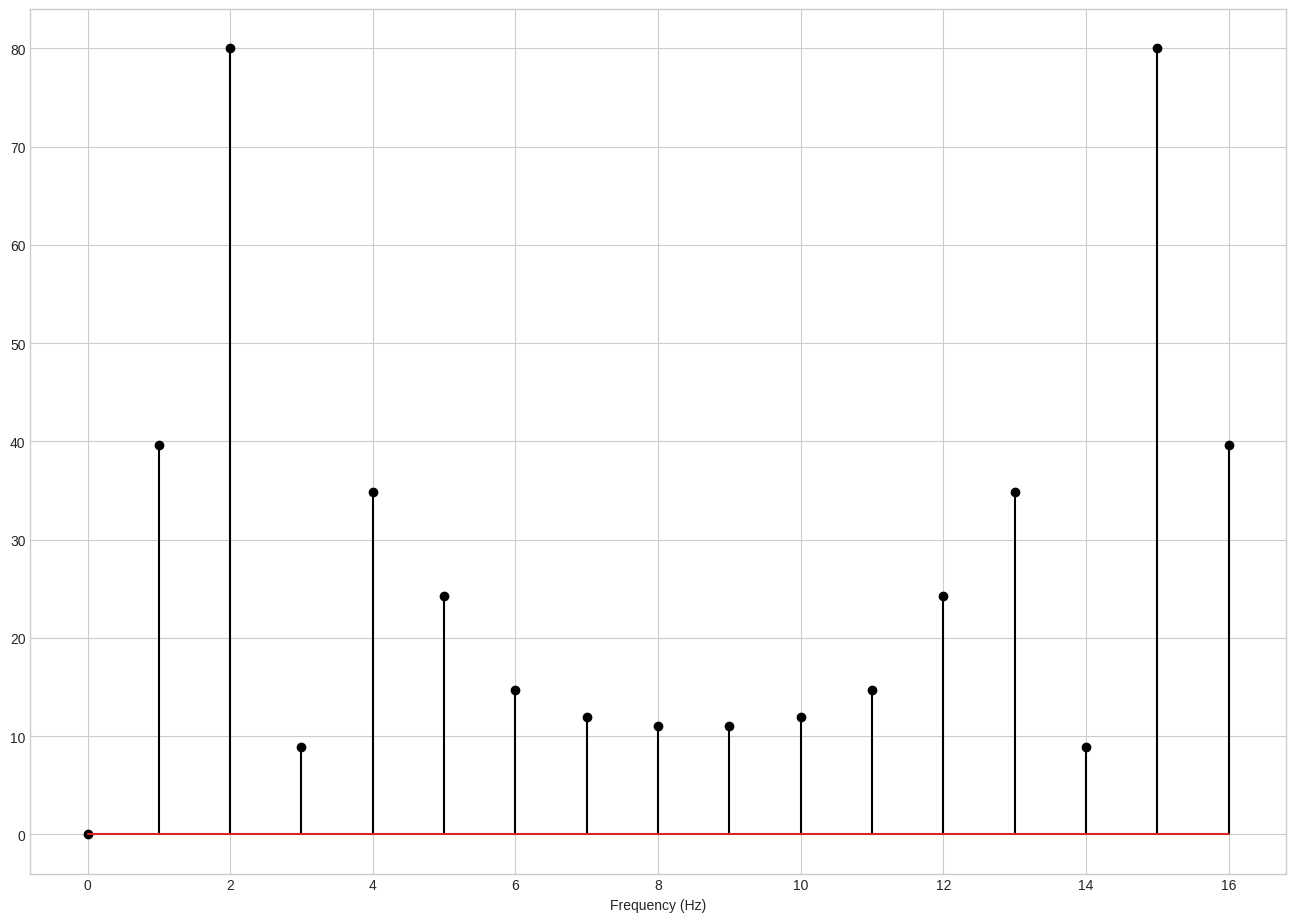

In [14]:
## Note that the sampled discrete sinusoid x can be treated as a vector.

# Compute the discrete Fourier transform of x using the in-built
# numpy function fft()
X = np.fft.fft(x)
print(X)

# Plot the magnitude of the discrete Fourier transform vector
fig, ax = plt.subplots(1, 1, figsize = (14,10))
fig.tight_layout(pad = 4.0)
ax.stem(range(0, len(X)), np.abs(X), 'k-')
ax.set_xlabel('Frequency (Hz)')

Text(0.5, 85.58333333333331, 'Frequency (Hz)')

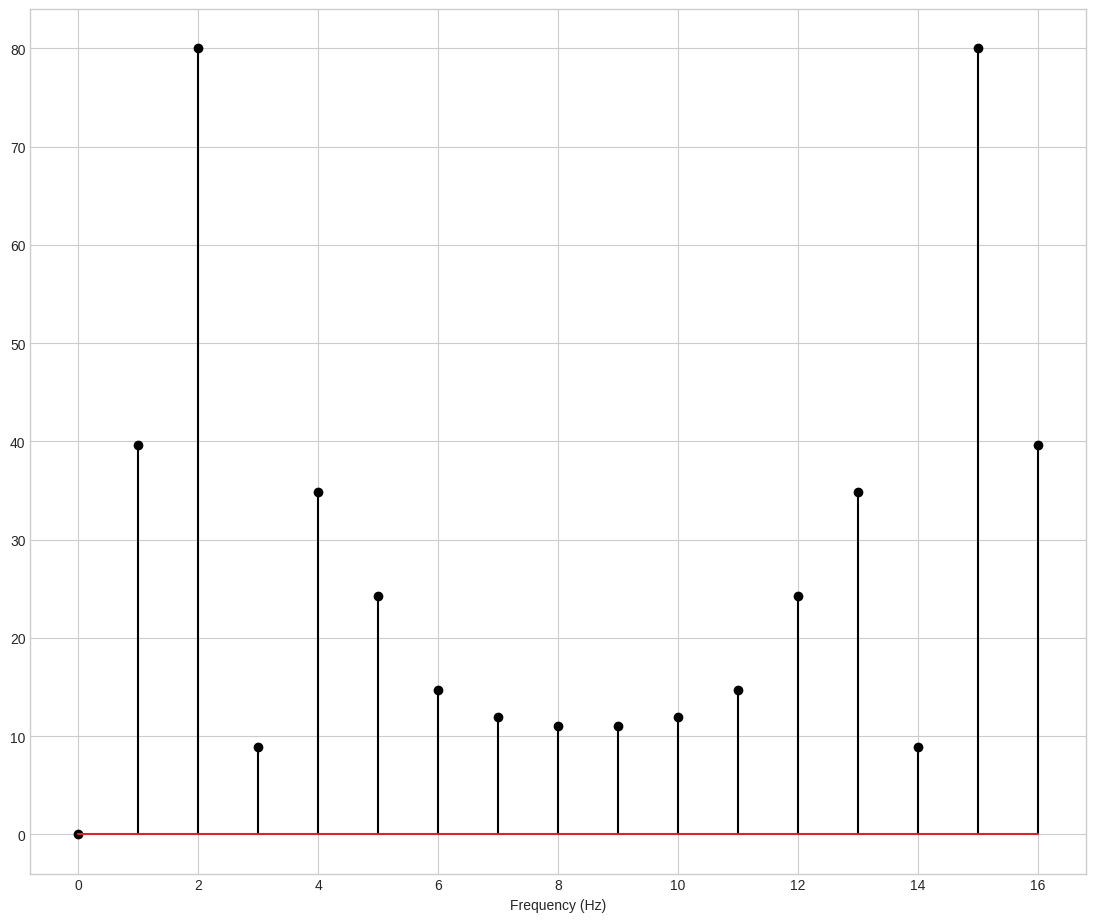

In [15]:
## Compute the discrete Fourier transform of x from scratch
n = len(x)

# Initialize discrete Fourier transform matrix to zeros
F = np.zeros((n, n))

# Fill-in the entries of the F matrix column by column
w = np.exp(-1j * ((2*np.pi)/n))
F = w**(np.arange(n) * np.arange(n)[:, np.newaxis])

# Compute the discrete Fourier transform
X = np.dot(F, x)
#print(X)

# Plot the magnitude of the discrete Fourier transform vector
fig, ax = plt.subplots(1, 1, figsize = (12,10))
fig.tight_layout(pad = 4.0)
ax.stem(range(0, len(X)), np.abs(X), 'k-')
ax.set_xlabel('Frequency (Hz)')

In [16]:
F[:, 1]

array([ 1.        +0.j        ,  0.93247223-0.36124167j,
        0.73900892-0.67369564j,  0.44573836-0.89516329j,
        0.09226836-0.99573418j, -0.27366299-0.96182564j,
       -0.60263464-0.79801723j, -0.85021714-0.52643216j,
       -0.9829731 -0.18374952j, -0.9829731 +0.18374952j,
       -0.85021714+0.52643216j, -0.60263464+0.79801723j,
       -0.27366299+0.96182564j,  0.09226836+0.99573418j,
        0.44573836+0.89516329j,  0.73900892+0.67369564j,
        0.93247223+0.36124167j])

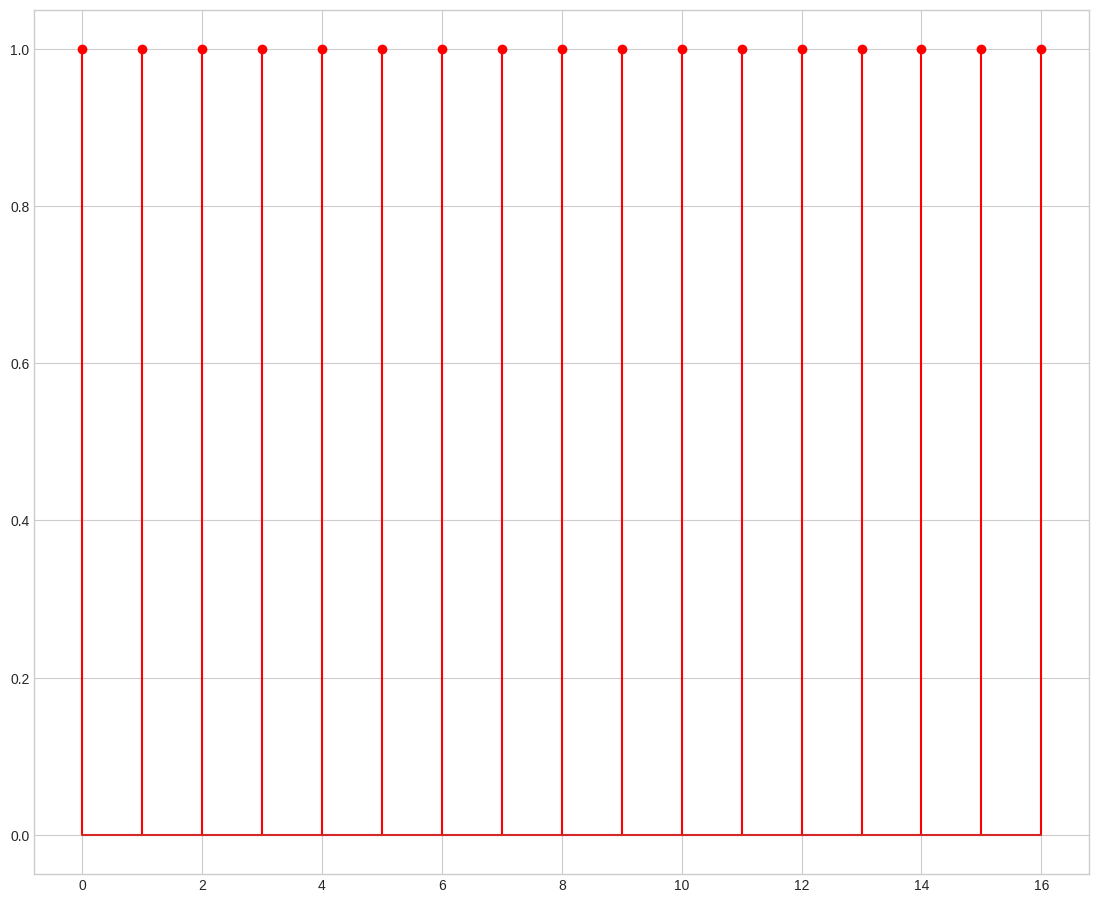

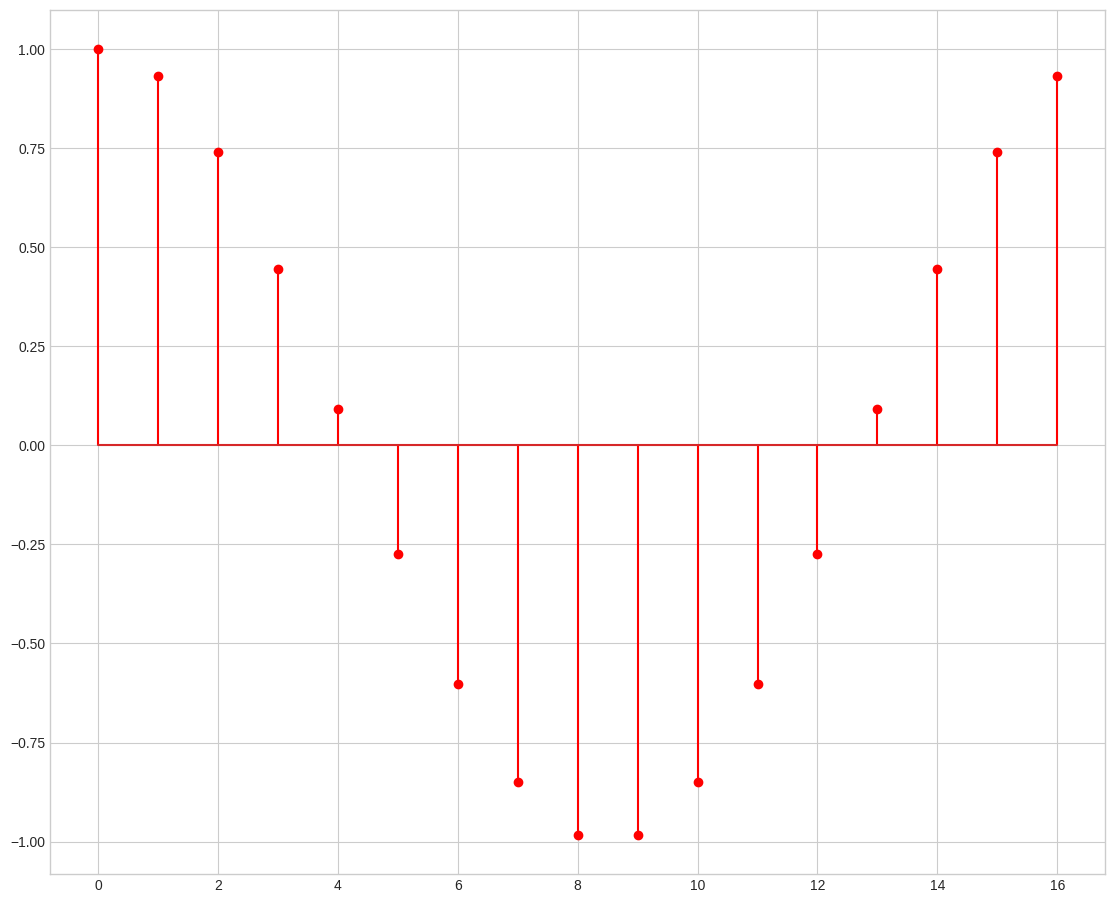

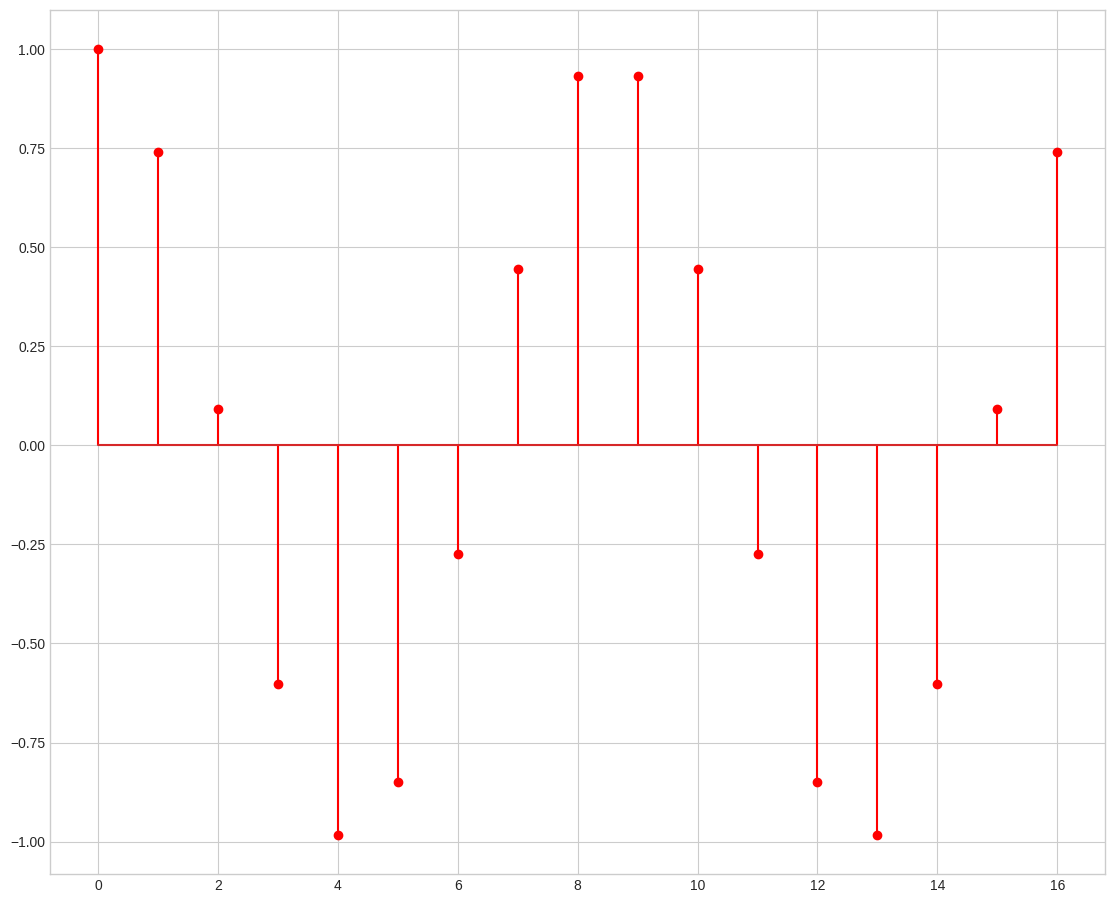

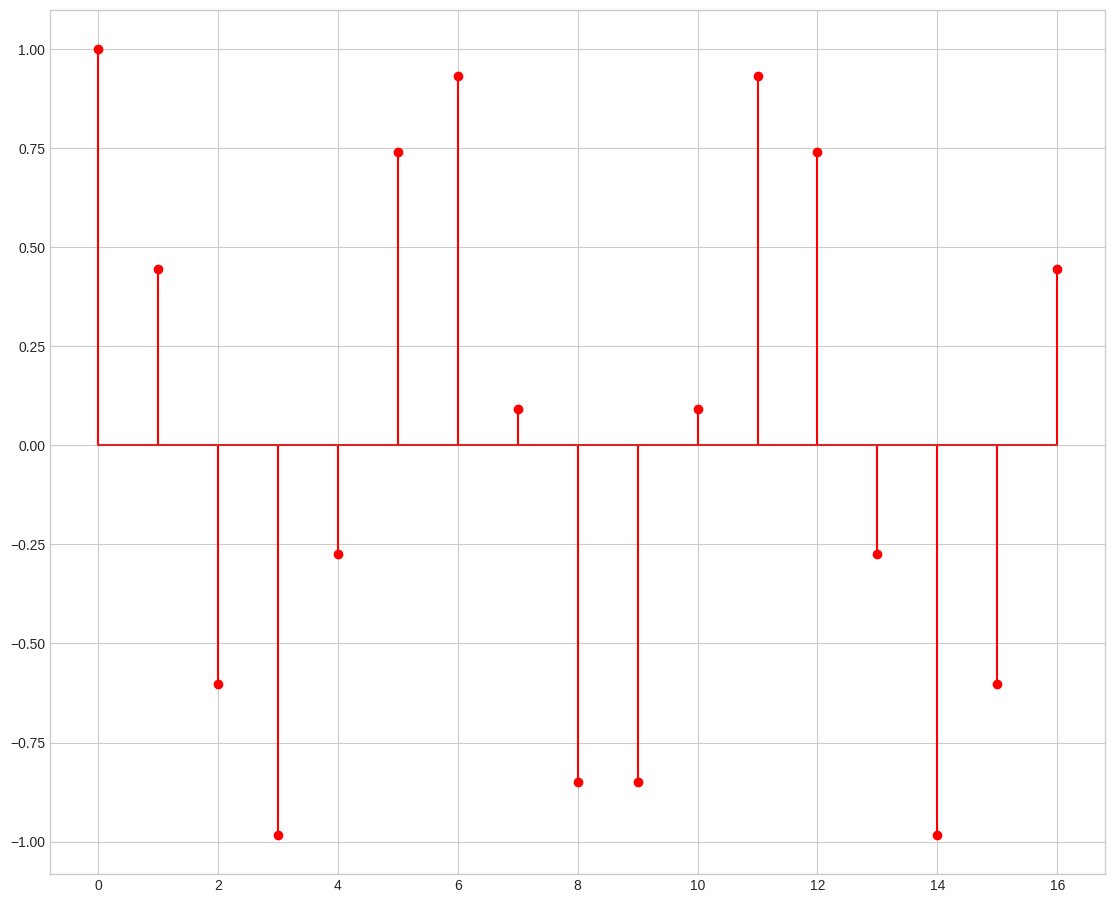

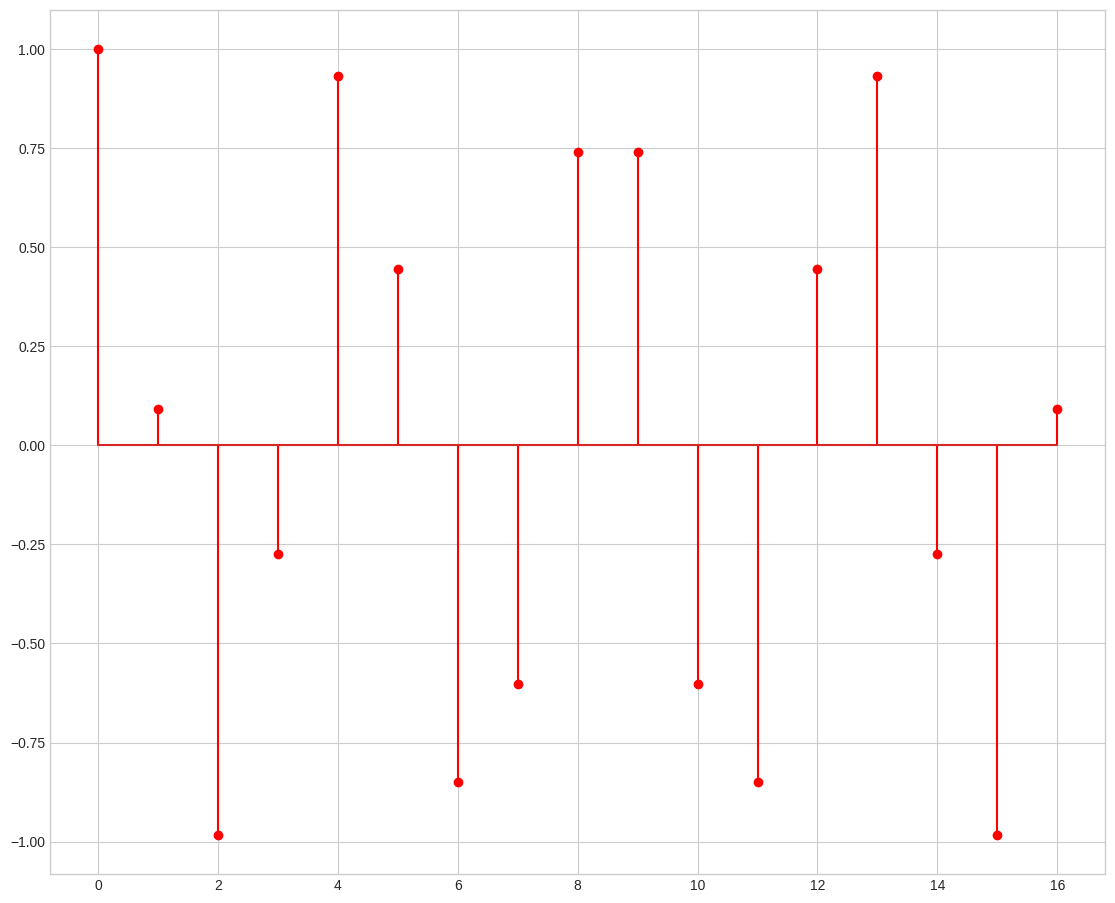

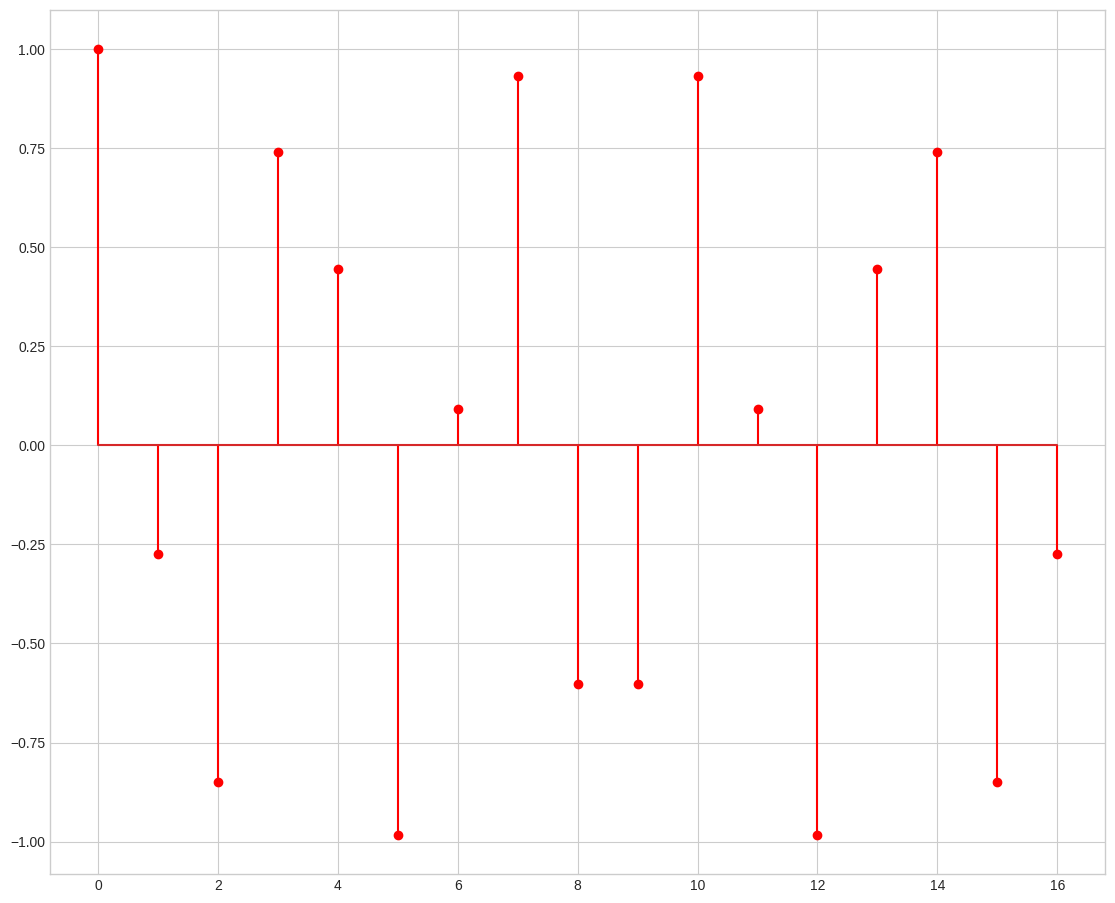

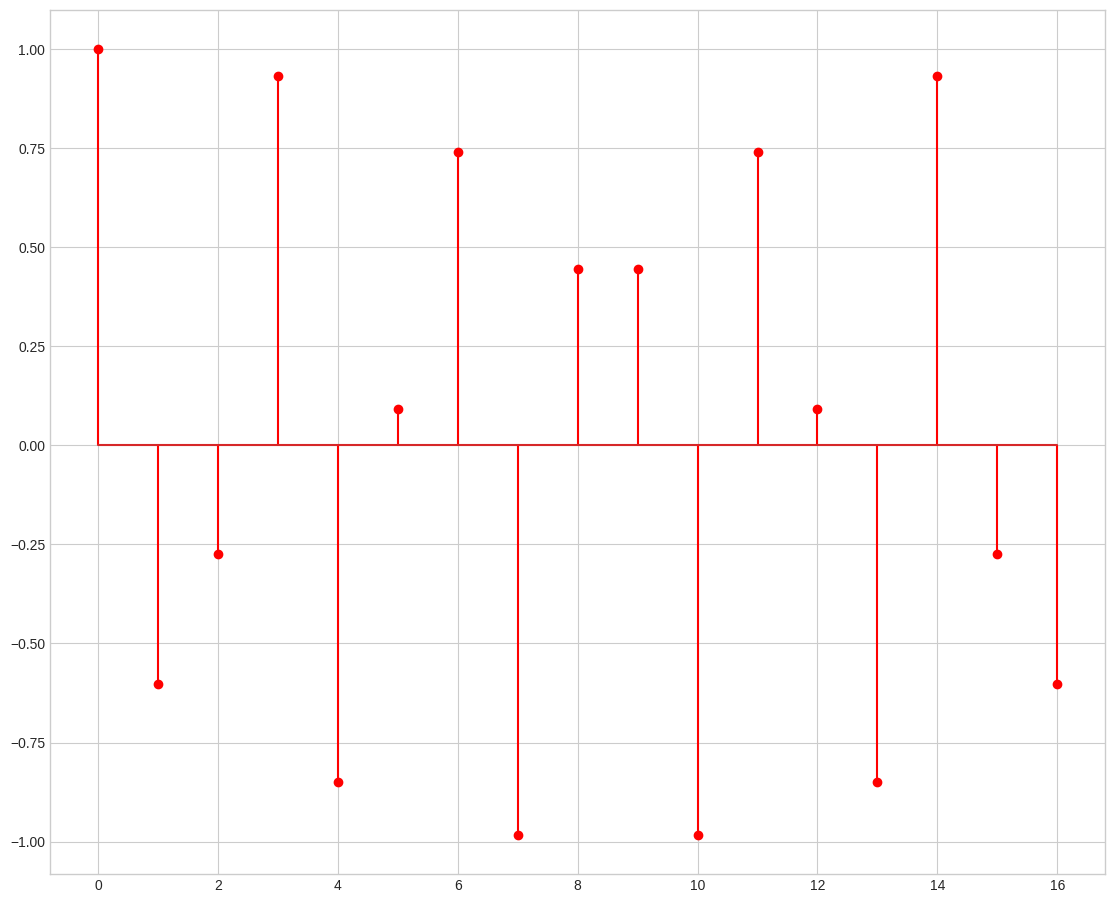

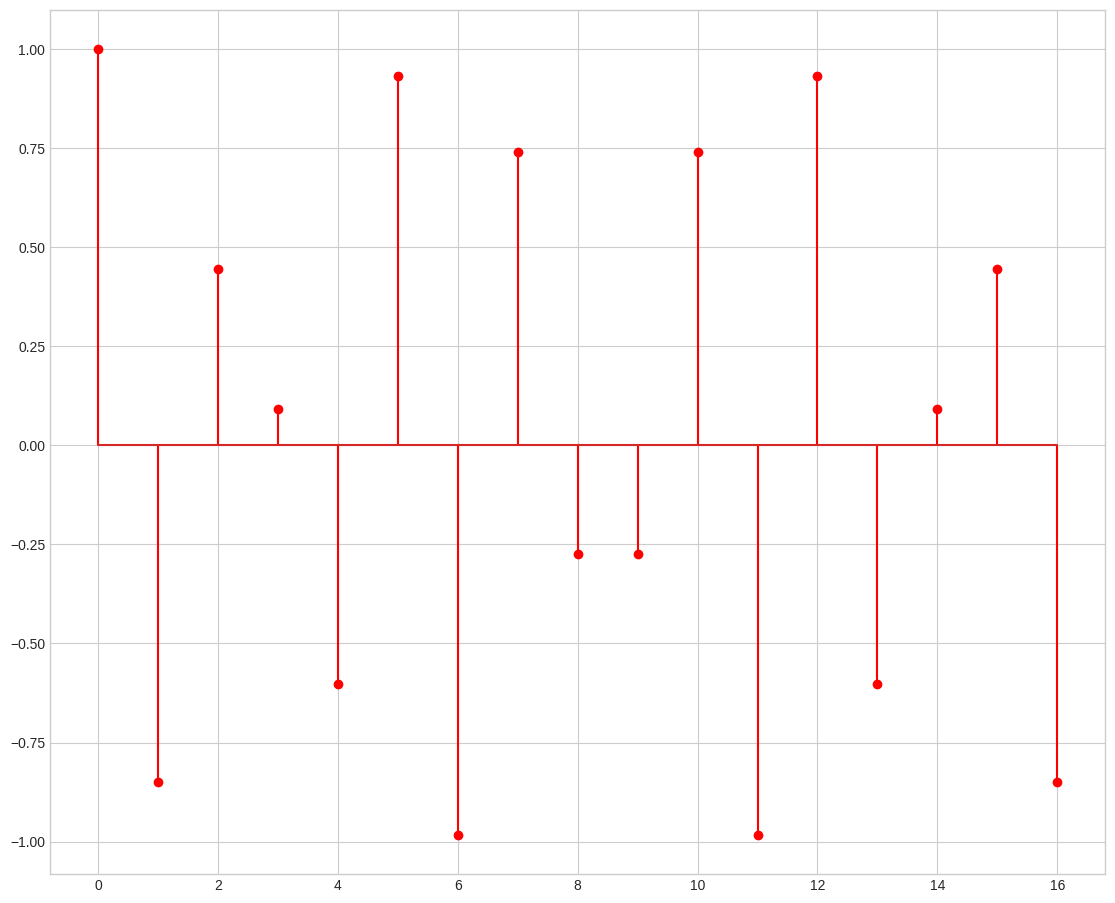

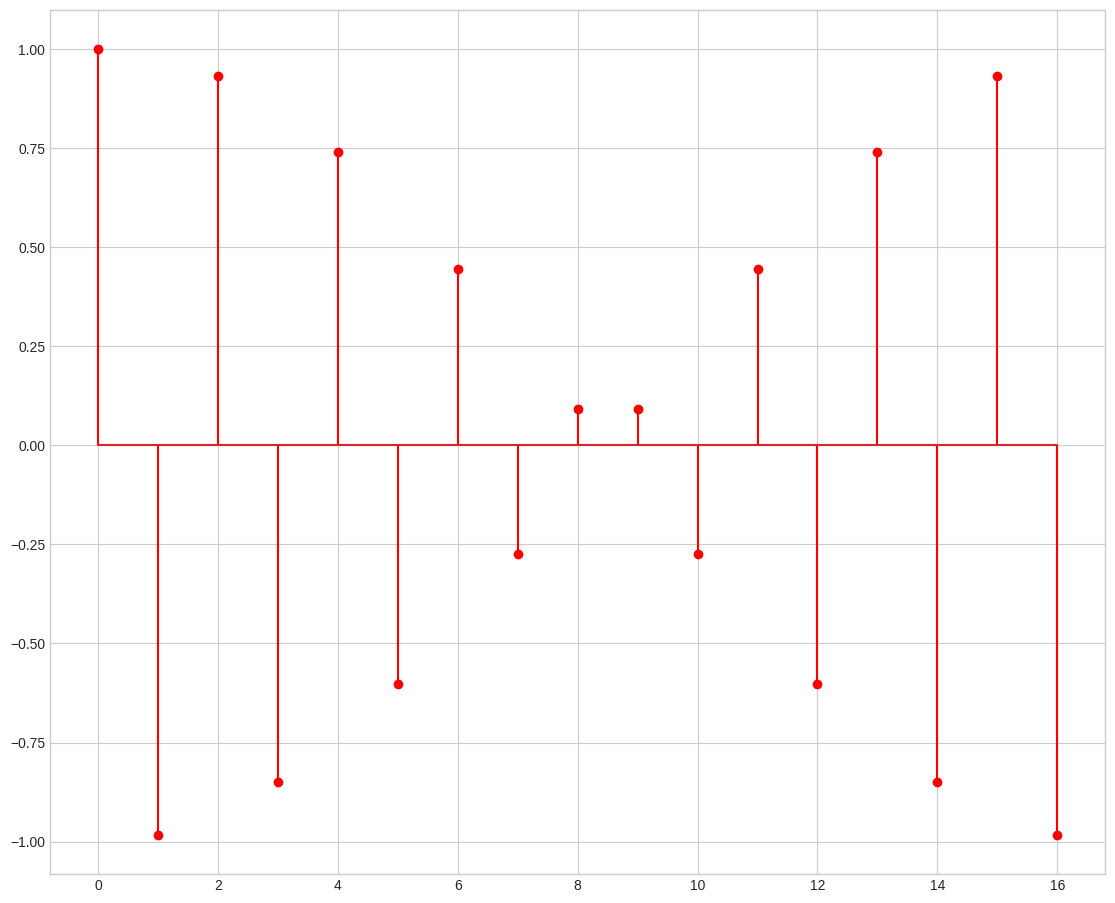

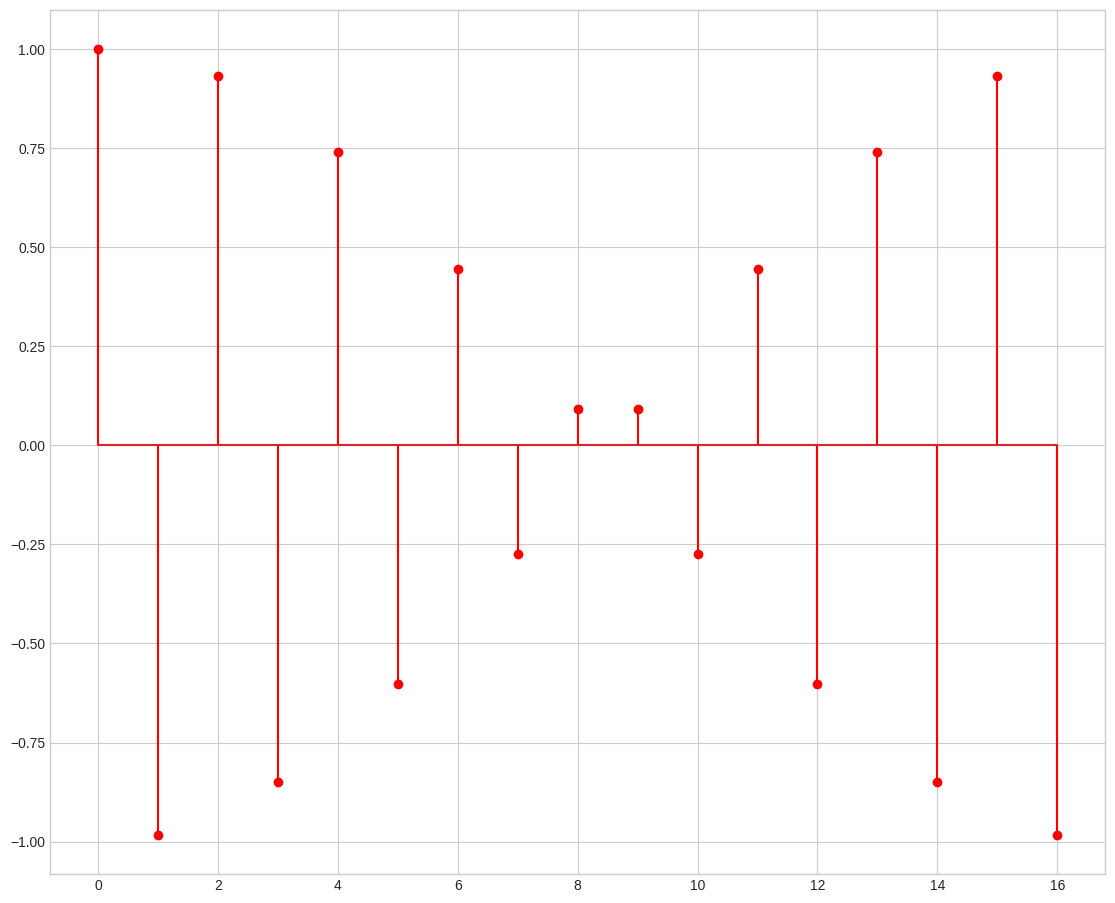

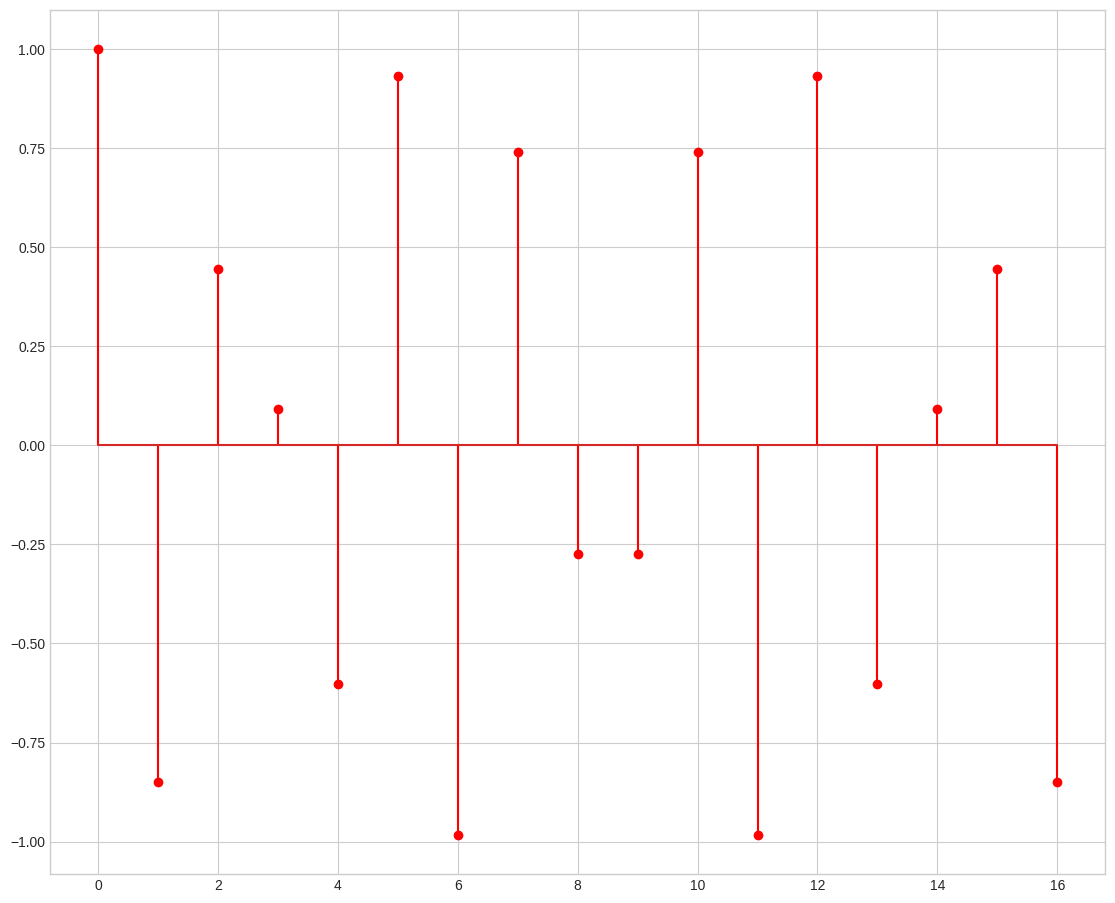

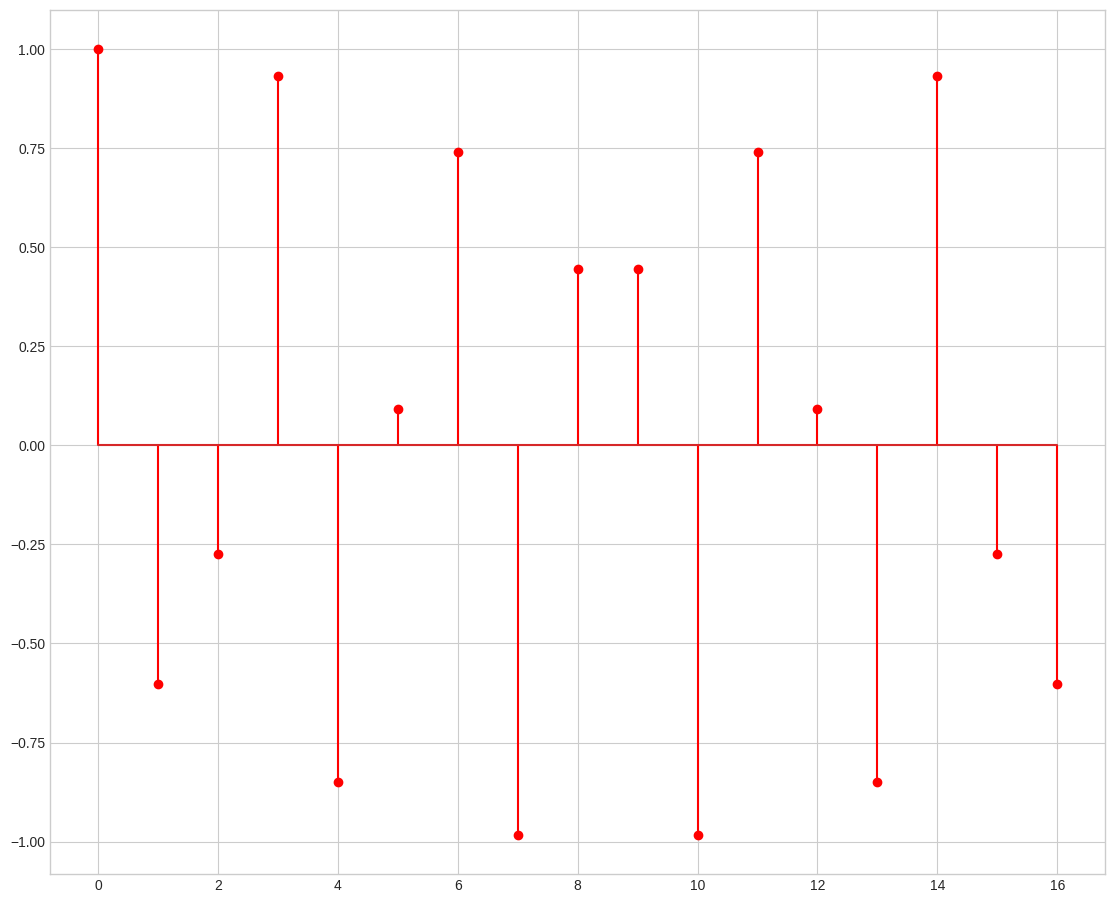

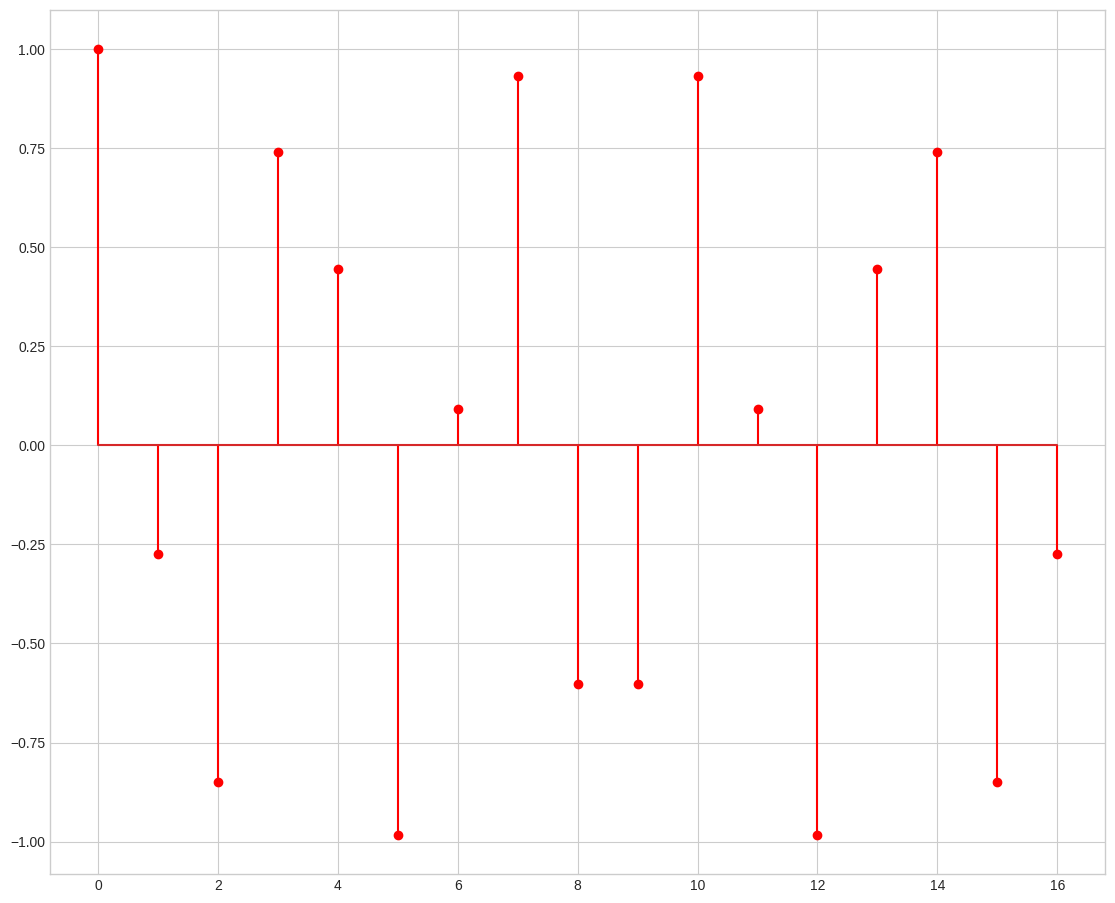

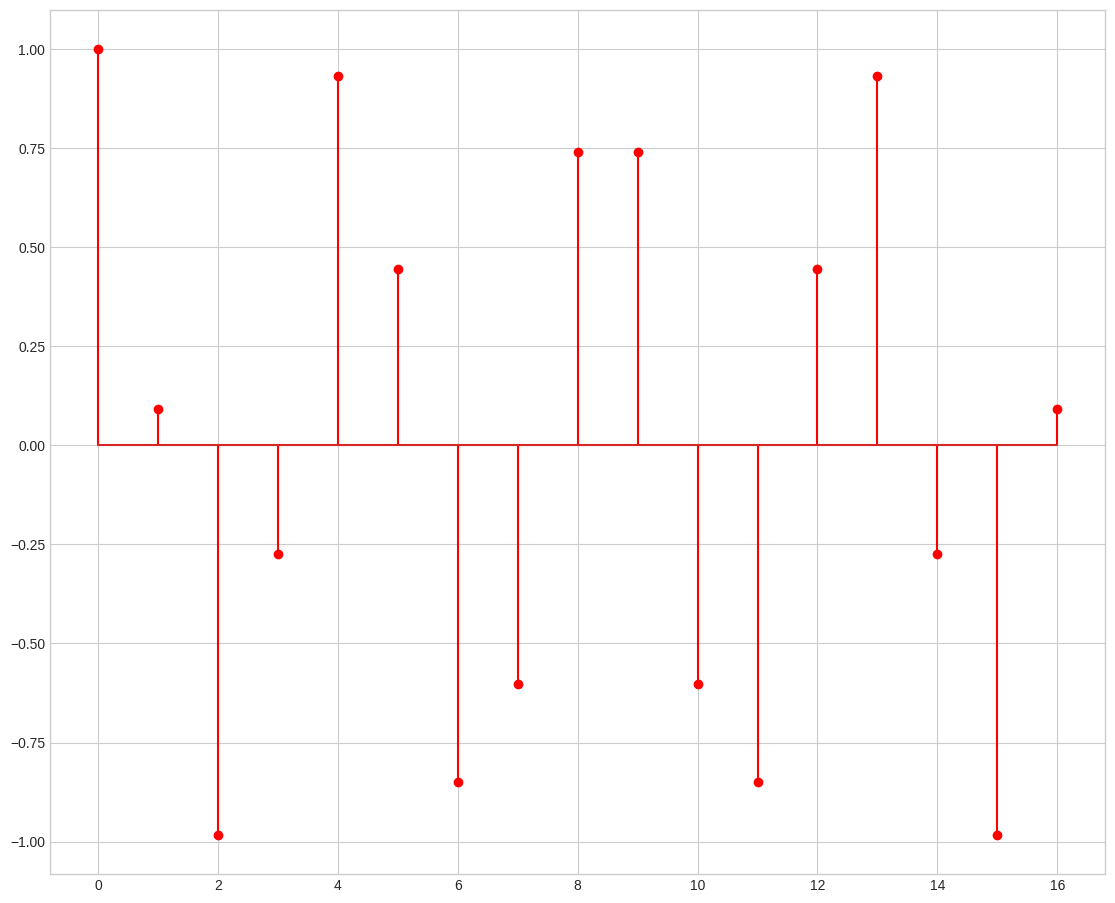

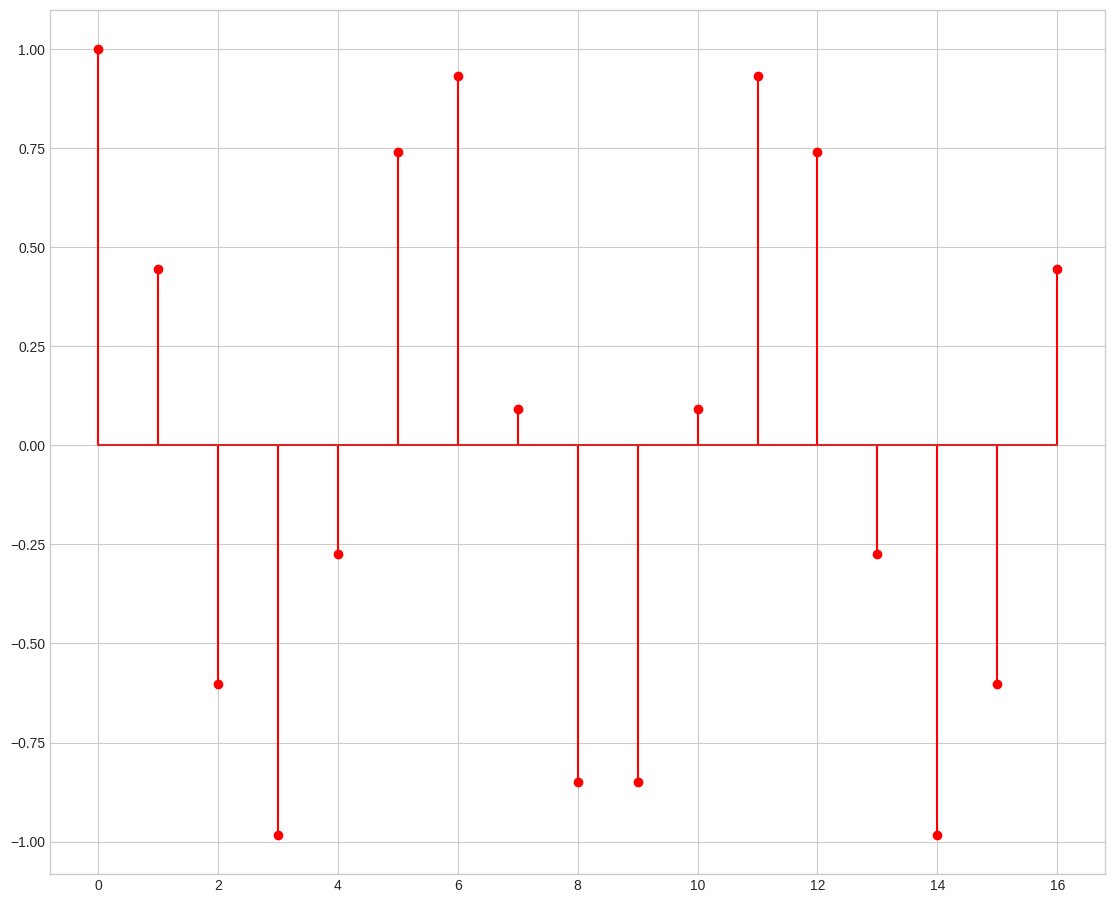

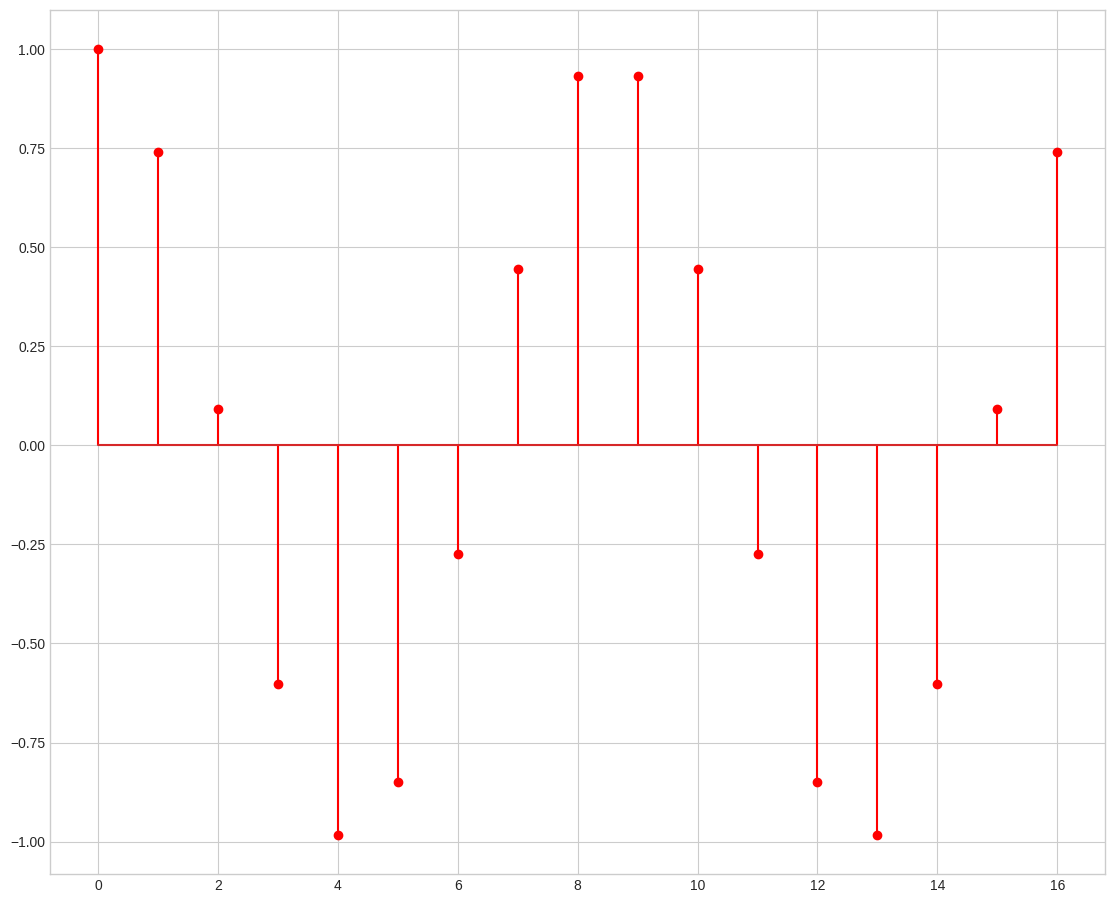

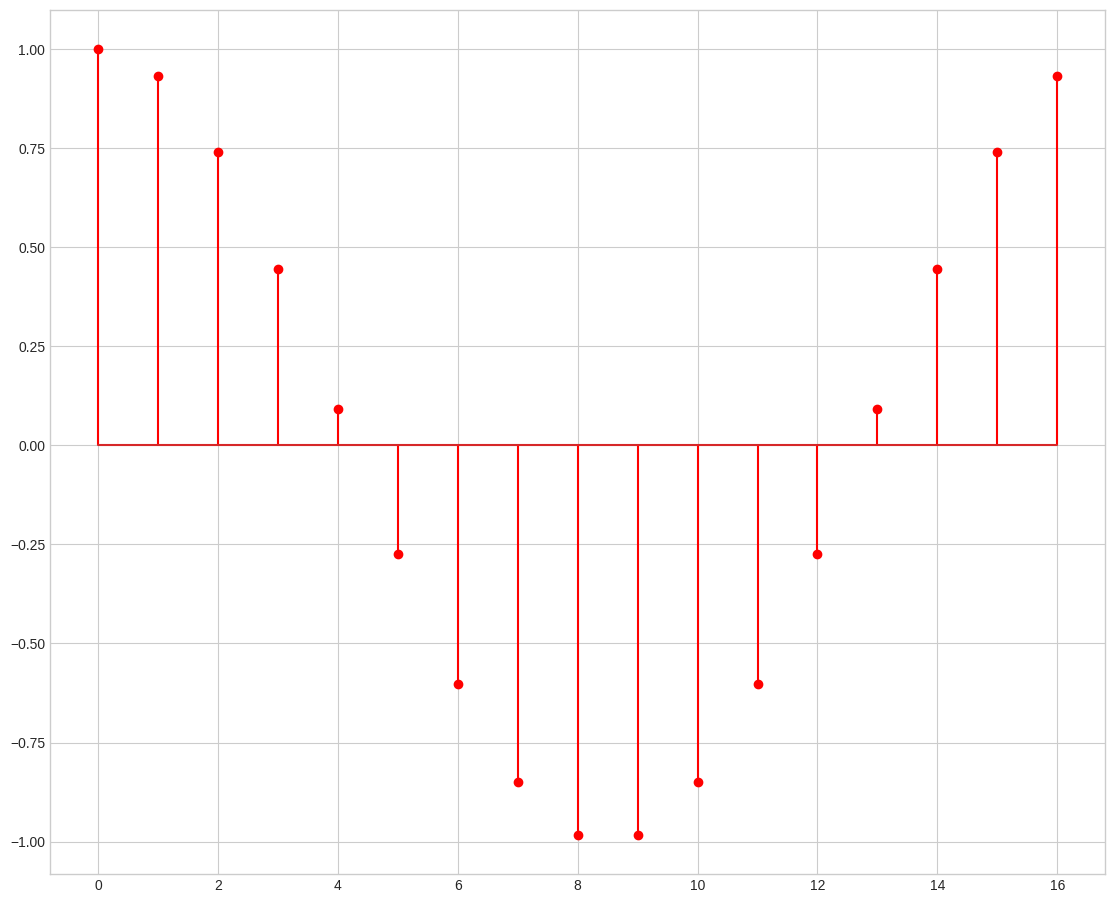

In [17]:
## Plot the discrete sinusoids corresponding to the real part of each column of F

# Note that the discrete sinusoid x is simply a linear combination of the discrete
# sinusoids that form the columns of the matrix F
for j in range(n):
  fig, ax = plt.subplots(1, 1, figsize = (12,10))
  fig.tight_layout(pad = 4.0)
  ax.stem(range(n), np.real(F[:, j]), 'r-')